# **Task 24 - (Article 124)** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DataScienceMastery/blob/main/DataVisualization/Tasks/task_24.ipynb)

|🔴 **WARNING** 🔴|
|:-----------:|
| If you have not studied article 124. Do checkout the articles before attempting the task. |
| Here is [Advanced Matplotlib](../Articles/124_advanced_matplotlib.md.md) |

### 📦 **Importing Relevant Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### **🖌️ Styling Configurations**

In [2]:
plt.style.use('default')

### ⚠️ **Data Warning**
For the questions forward, we are going to use the Power Generation Dataset, which is in the [Data](../Resources/Data/) folder.  
Link to the dataset : [PowerGeneration](https://rb.gy/gsmddu)

In [3]:
power_gen_df = pd.read_csv('../Resources/Data/PowerGeneration.csv')

**Note :** Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations. Then, you can customize it according to your will.

### 🎯 **Q01 : Subplots with Scatter Plots for Power Station Analysis**

1. **Dataset:** [PowerGeneration](../Resources/Data/PowerGeneration.csv)

2. **Task Description:**

   * Create a subplot containing two charts side by side.
   * **First Chart:**

     * Plot a scatter plot of *"Monitored Cap. (MW)"* vs. *"Total Cap. Under Maintenance (MW)"*.
     * Use data from the top 5 most frequent power stations.
     * Draw horizontal and vertical lines to show the average values of both columns.
     * Color the scatter points based on the names of the power stations.
   * **Second Chart:**

     * Plot a scatter plot of *"Monitored Cap. (MW)"* vs. *"Actual (MU)"*.
     * Use data from the same top 5 most frequent power stations.
     * Draw horizontal and vertical lines to indicate the average values of these columns.
     * Color the scatter points according to the names of the power stations.

3. **Expected Outcome:**
   Two visually informative scatter plots in a single figure, showing relationships between monitored capacity and other metrics for the top 5 power stations with average reference lines and color-coded points.

In [ ]:
freq5_stations = power_gen_df['Power Station'].value_counts().sort_values(ascending=False).head().index

In [83]:
columns = [
    'Power Station',
    'Monitored Cap.(MW)',
    'Total Cap. Under Maintenace (MW)',
    'Actual(MU)',
    'Forced Maintanence(MW)'
]
filtered_df = power_gen_df[columns][power_gen_df['Power Station'].isin(freq5_stations)]

In [62]:
le = LabelEncoder()
le.fit(freq5_stations)

LabelEncoder()

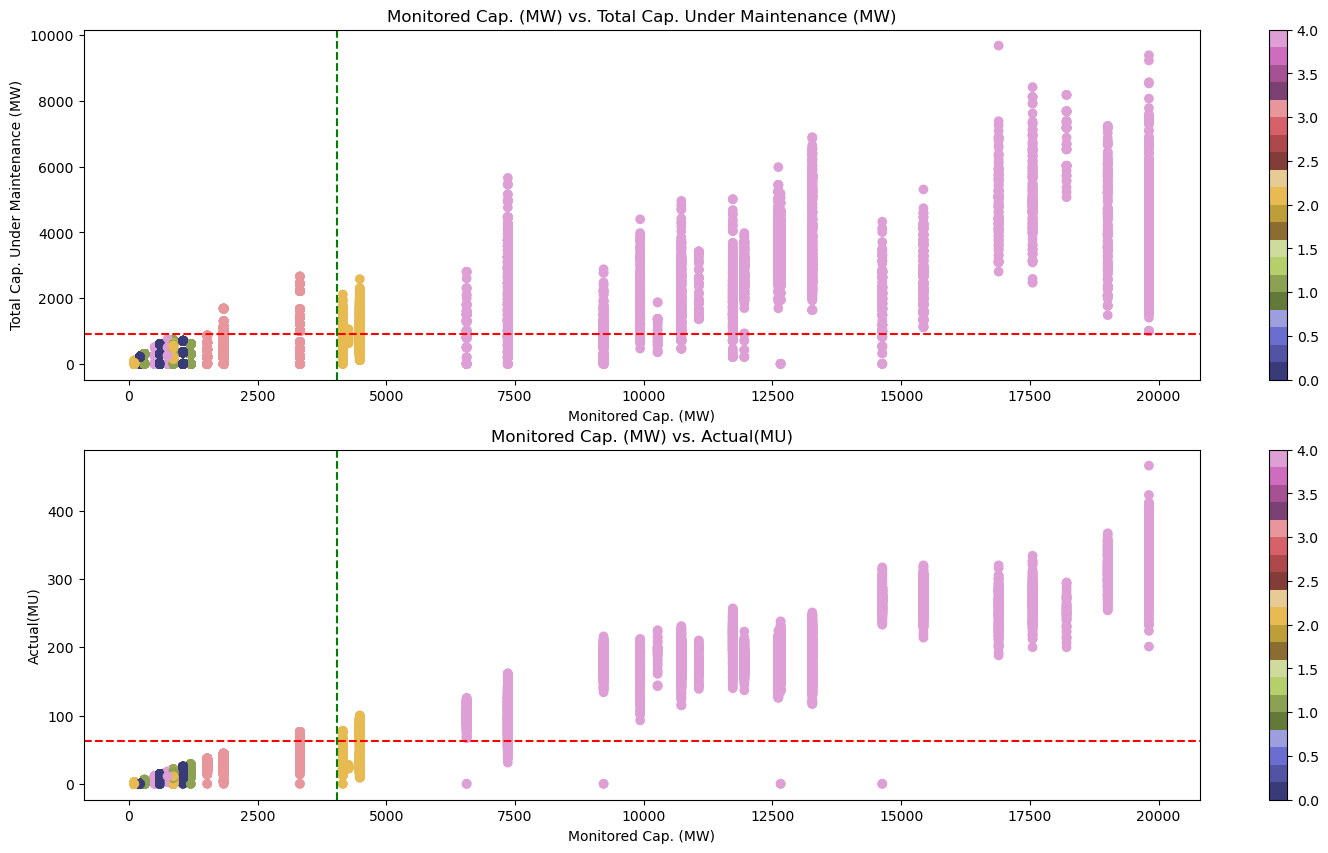

In [79]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(18)
fig.set_figheight(10)

# Plot Number 01
chart1 = axes[0].scatter(
    x=filtered_df['Monitored Cap.(MW)'],
    y=filtered_df['Total Cap. Under Maintenace (MW)'],
    c=le.transform(filtered_df['Power Station']),
    cmap='tab20b'
)
axes[0].set_title('Monitored Cap. (MW) vs. Total Cap. Under Maintenance (MW)')
axes[0].set_xlabel('Monitored Cap. (MW)')
axes[0].set_ylabel('Total Cap. Under Maintenance (MW)')
axes[0].axhline(
    y=filtered_df['Total Cap. Under Maintenace (MW)'].mean(),
    color='red',
    linestyle='--'
)
axes[0].axvline(
    x=filtered_df['Monitored Cap.(MW)'].mean(),
    color='green',
    linestyle='--'
)
fig.colorbar(chart1, ax=axes[0])


# Plot Number 02
chart2 = axes[1].scatter(
    x=filtered_df['Monitored Cap.(MW)'],
    y=filtered_df['Actual(MU)'],
    c=le.transform(filtered_df['Power Station']),
    cmap='tab20b'
)
axes[1].set_title('Monitored Cap. (MW) vs. Actual(MU)')
axes[1].set_xlabel('Monitored Cap. (MW)')
axes[1].set_ylabel('Actual(MU)')
axes[1].axhline(
    y=filtered_df['Actual(MU)'].mean(),
    color='red',
    linestyle='--'
)
axes[1].axvline(
    x=filtered_df['Monitored Cap.(MW)'].mean(),
    color='green',
    linestyle='--'
)
fig.colorbar(chart2, ax=axes[1])


plt.show()

### 🎯 **Q02 : 3D Scatter — Capacity vs Maintenance vs Forced Maintenance**

1. **Dataset:** [PowerGeneration](../Resources/Data/PowerGeneration.csv)

2. **Task Description:**

   * Create a 3D scatter plot with:

     * X-axis: *Monitored Cap. (MW)*
     * Y-axis: *Total Cap. Under Maintenance (MW)*
     * Z-axis: *Forced Maintenance (MW)*
   * Optionally color or marker-style points by power station name or category for better differentiation.
   * Add axis labels, a legend (if coloring by station), and a descriptive title.
   * Ensure the plot is well-sized and the view angle allows clear inspection of point distribution.

3. **Expected Outcome:**
   A clear 3D scatter plot that visualizes the relationship between monitored capacity, total maintenance capacity, and forced maintenance for power stations.


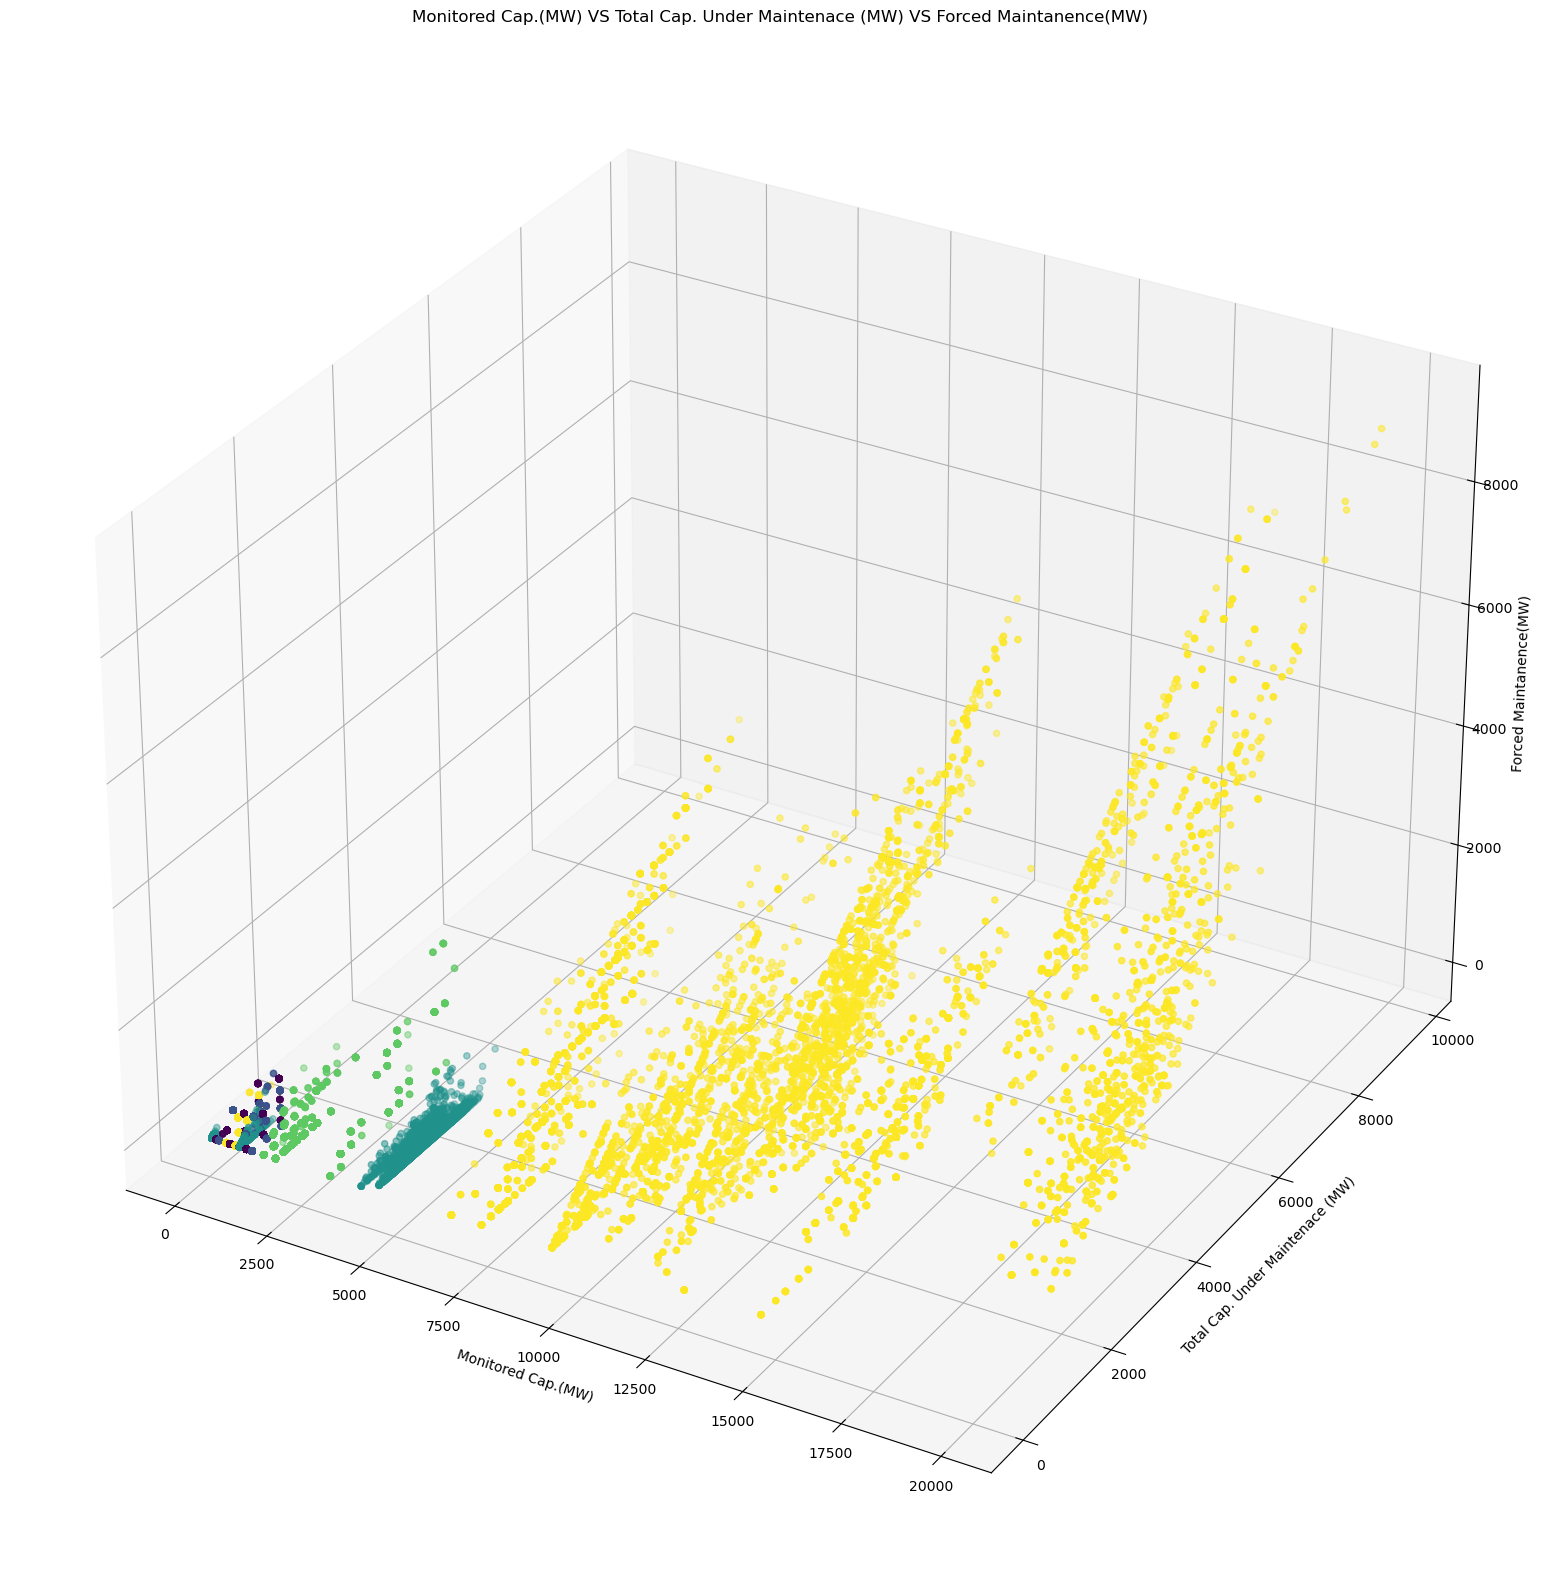

In [93]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    xs=filtered_df['Monitored Cap.(MW)'],
    ys=filtered_df['Total Cap. Under Maintenace (MW)'],
    zs=filtered_df['Forced Maintanence(MW)'],
    c=le.transform(filtered_df['Power Station'])
)
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenace (MW)')
ax.set_zlabel('Forced Maintanence(MW)')
ax.set_title('Monitored Cap.(MW) VS Total Cap. Under Maintenace (MW) VS Forced Maintanence(MW)')

plt.show()

### 🎯 **Q03 : 3D Surface Plot of Equation involving Absolute Values**

1. **Dataset:** *Not Required* (mathematically generated dataset)

2. **Task Description:**

   * Define a grid of values for *x* and *y*, ranging between suitable intervals (e.g., -10 to 10).
   * Compute corresponding *z* values using the equation:
     $$
     z = |x| - |y|
     $$
   * Generate a 3D surface plot using the computed *x*, *y*, and *z* values.
   * Label the axes (*X*, *Y*, and *Z*) and provide a title for better clarity.
   * Optionally customize the viewing angle or colormap for improved visualization.

3. **Expected Outcome:**
   A 3D surface plot visualizing the function ( z = |x| - |y| ), showing how the surface varies based on the absolute values of *x* and *y*.


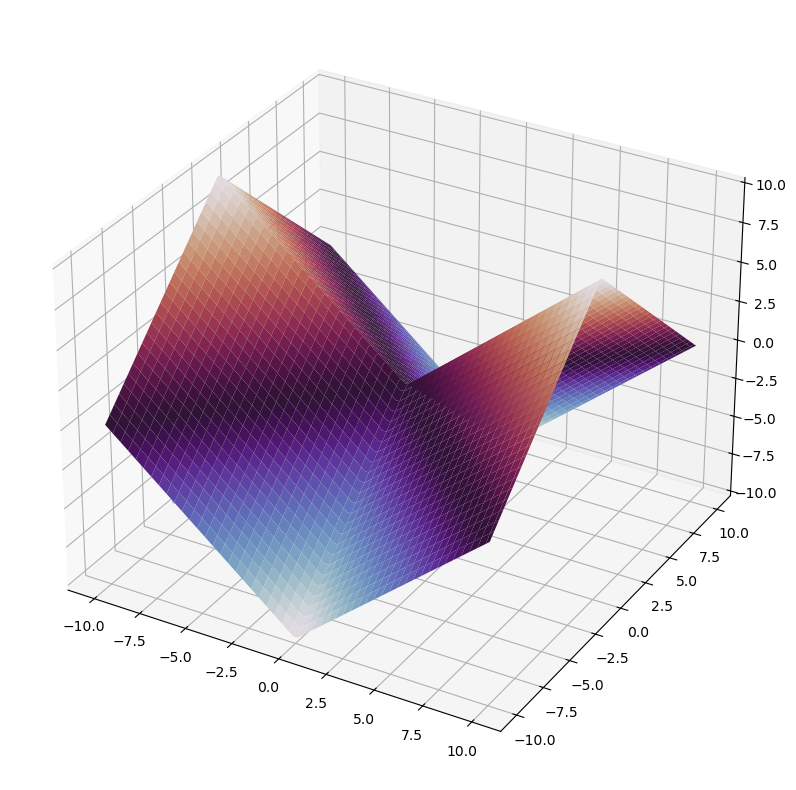

In [102]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

zz = np.abs(xx) - np.abs(yy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='twilight')

plt.show()

### 🎯 **Q04 : 3D Contour Plot of Equation involving Absolute Values**

1. **Dataset:** *Not Required* (mathematically generated dataset)

2. **Task Description:**

   * Define a range of values for *x* and *y* (e.g., from -10 to 10).
   * Compute the corresponding *z* values using the equation:
     $$
     z = |x| - |y|
     $$
   * Plot a **3D contour plot** using the calculated *x*, *y*, and *z* values.
   * Label all axes (*X*, *Y*, and *Z*) and include a title for context.
   * Adjust contour levels and styles if necessary for clearer visualization.

3. **Expected Outcome:**
   A 3D contour plot that visualizes the relationship among *x*, *y*, and *z* values as defined by the equation ( z = |x| - |y| ).


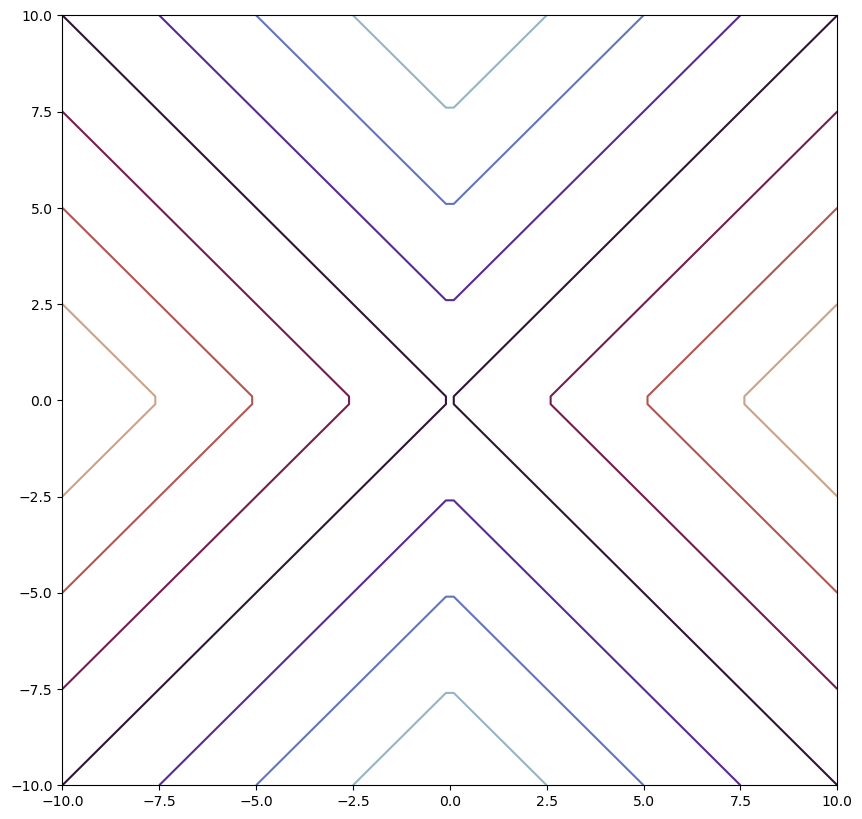

In [108]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

zz = np.abs(xx) - np.abs(yy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.contour(xx, yy, zz, cmap='twilight')

plt.show()

### 🎯 **Q05 : 3D Contour Plot (Filled Version) of Equation involving Absolute Values**

1. **Dataset:** *Not Required* (mathematically generated dataset)

2. **Task Description:**

   * Define a range of values for *x* and *y* (e.g., from -10 to 10).
   * Compute the corresponding *z* values using the equation:
     $$
     z = |x| - |y|
     $$
   * Plot a **3D contour plot (Filled Version)** using the calculated *x*, *y*, and *z* values.
   * Label all axes (*X*, *Y*, and *Z*) and include a title for context.
   * Adjust contour levels and styles if necessary for clearer visualization.

3. **Expected Outcome:**
   A 3D contour plot that visualizes the relationship among *x*, *y*, and *z* values as defined by the equation ( z = |x| - |y| ).


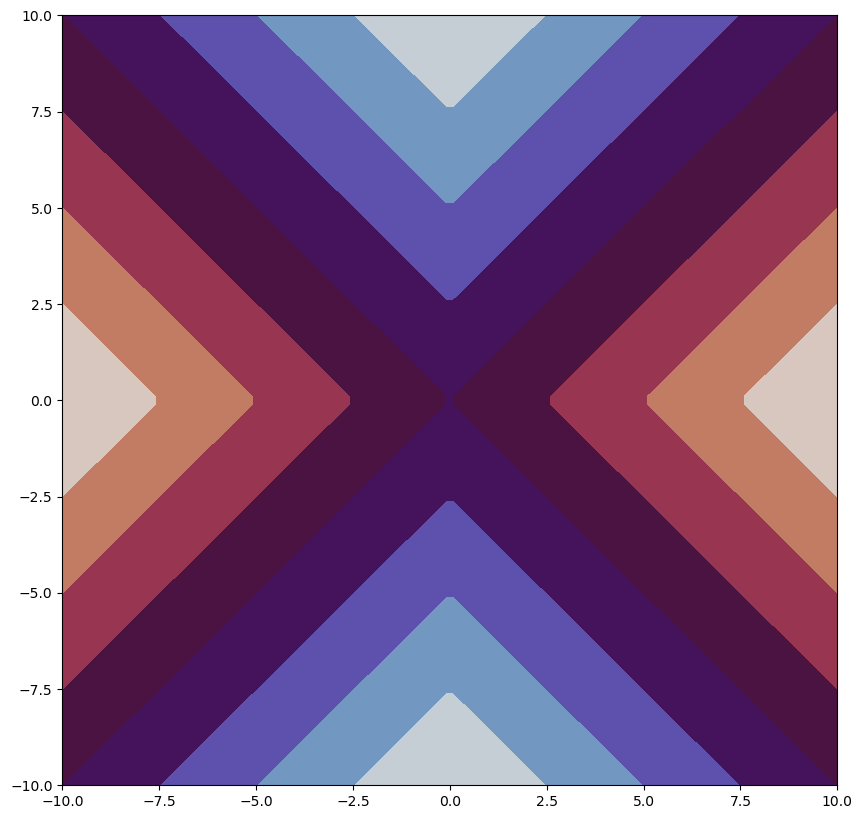

In [109]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

zz = np.abs(xx) - np.abs(yy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.contourf(xx, yy, zz, cmap='twilight')

plt.show()

### ⚠️ **Data Warning**
For the questions forward, we are going to use NIFTY50 Dataset, which is in the [Data](../Resources/Data/) folder.  
Link to the dataset : [PowerGeneration](https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link)  

In [110]:
nifty50_df = pd.read_csv('../Resources/Data/NIFTY50.csv')

#### **NIFTY50 Dataset (Feature Description)**

The dataset contains daily trading statistics for stocks listed in the NIFTY 50 index. Each row provides data for one stock on a specific date. The columns are described below:

| **Column Name** | **Description**                                                                                                            |
| --------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **Date**        | Represents the specific trading date for the stock.                                                                        |
| **Symbol**      | The ticker name of the stock (e.g., TCS, INFY).                                                                            |
| **Open**        | The stock’s opening price at the start of the trading day.                                                                 |
| **High**        | The highest price reached by the stock during the trading day.                                                             |
| **Low**         | The lowest price reached by the stock during the trading day.                                                              |
| **Close**       | The stock’s price at the end of the trading session.                                                                       |
| **Volume**      | Total number of shares traded on that day.                                                                                 |
| **VWAP**        | *Volume Weighted Average Price.* It indicates the average price of the stock, adjusted by the trading volume over the day. |
| **Turnover**    | Total value (in INR) generated during trading for that stock on that day (calculated as $Close × Volume$).                 |

### 🎯 **Q06 : Line Plot of Closing Values for Top 5 Stocks in 2020**

1. **Dataset:** [NIFTY50](../Resources/Data/NIFTY50.csv)

2. **Task Description:**

   * Load the dataset containing stock market information for the year 2020.
   * Calculate the total turnover for each stock in 2020.
   * Identify the top 5 stocks based on total turnover.
   * Plot the closing values of these top 5 stocks over time using Pandas plotting functions.
   * Ensure the plot uses:

     * Date on the X-axis.
     * Closing price on the Y-axis.
     * Different line styles or colors for each stock.
   * Add labels, title, and legend for clarity.

3. **Expected Outcome:**
   A line chart showing the closing price trends of the top 5 stocks (by turnover) throughout 2020.


In [156]:
nifty50_df['Date'] = pd.to_datetime(nifty50_df['Date'])
filtered_df = nifty50_df[nifty50_df.Date.map(lambda x : x.year) == 2020]

In [157]:
stock_group = filtered_df.groupby(by='Symbol')
top5_stocks = stock_group['Turnover'].agg(func='sum').sort_values(ascending=False).head(5).index

In [158]:
top5_df_group = filtered_df[filtered_df['Symbol'].isin(top5_stocks)].groupby(by='Symbol')

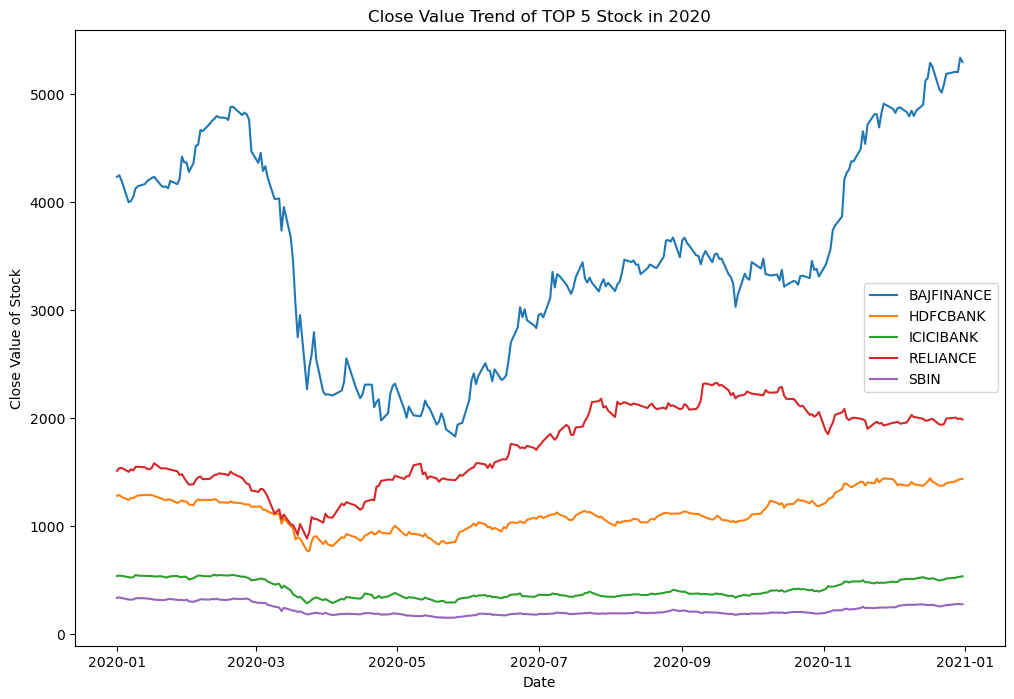

In [170]:
plt.figure(figsize=(12, 8))

for group, group_df in top5_df_group:
    group_df = group_df.sort_values(by='Date')
    plt.plot(
        group_df['Date'],
        group_df['Close'],
        label=group
    )
plt.title('Close Value Trend of TOP 5 Stock in 2020')
plt.xlabel('Date')
plt.ylabel('Close Value of Stock')
plt.legend()
plt.show()

### 🎯 **Q07 : Scatter Plot of Close Price vs Volume for Top 5 Stocks in 2021**

1. **Dataset:** [NIFTY50](../Resources/Data/NIFTY50.csv)

2. **Task Description:**

   * Load the dataset containing stock market data for the year 2021.
   * Calculate the total volume or another metric (e.g., turnover) to identify the top 5 stocks for 2021.
   * Create a scatter plot showing:

     * X-axis: *Close Price*
     * Y-axis: *Volume*
   * Use color coding based on the *Symbol* column to differentiate the top 5 stocks.
   * Add labels, a title, and a legend for better interpretation.

3. **Expected Outcome:**
   A scatter plot visualizing the relationship between close price and volume for the top 5 stocks in 2021, with each stock distinguished by color.


In [172]:
filtered_df = nifty50_df[nifty50_df.Date.map(lambda x : x.year) == 2021]
stock_group = filtered_df.groupby(by='Symbol')
top5_stocks = stock_group['Turnover'].agg(func='sum').sort_values(ascending=False).head(5).index
top5_df_group = filtered_df[filtered_df['Symbol'].isin(top5_stocks)].groupby(by='Symbol')

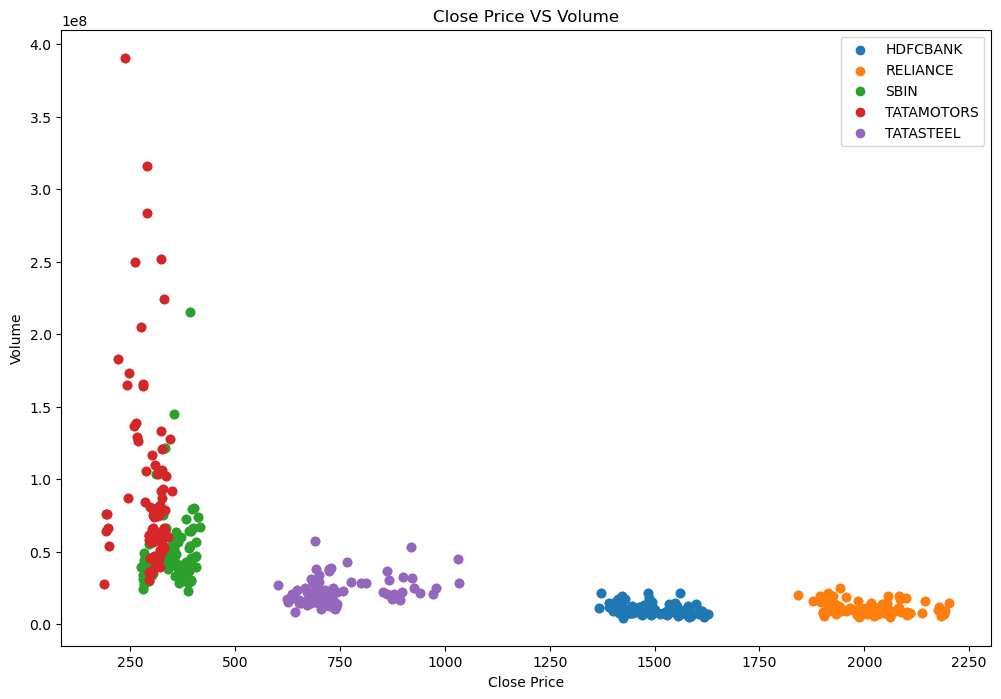

In [174]:
plt.figure(figsize=(12, 8))

for group, group_df in top5_df_group:
    group_df = group_df.sort_values(by='Date')
    plt.scatter(
        group_df['Close'],
        group_df['Volume'],
        label=group
    )
plt.title('Close Price VS Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.legend()
plt.show()

### ⚠️ **Data Warning**
For the questions forward, we are going to use the below Synthetic Dataset.

In [175]:
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time
synthetic_df = pd.DataFrame(
    {
        'time': time,
        'x': x,
        'y': y,
        'z': z
    }
)

### 🎯 **Q08 : 3D Scatter Plot with Time, X, Y and Z Gradient Coloring**

1. **Dataset:** Synthetic Data (Generated Above)

2. **Task Description:**

   * Use the synthetic dataset generated above containing four columns: *time*, *x*, *y*, and *z*.
   * Create a **3D scatter plot** where:

     * X-axis represents *time*
     * Y-axis represents *x*
     * Z-axis represents *y*
   * Apply a color gradient based on the values in the *z* column to visually encode the fourth dimension.
   * Label all axes and provide a descriptive title.
   * Optionally include a color bar to show the scale of *z* values.

3. **Expected Outcome:**
   A 3D scatter plot that visualizes the relationship between *time*, *x*, *y*, and *z* using color gradients for depth.


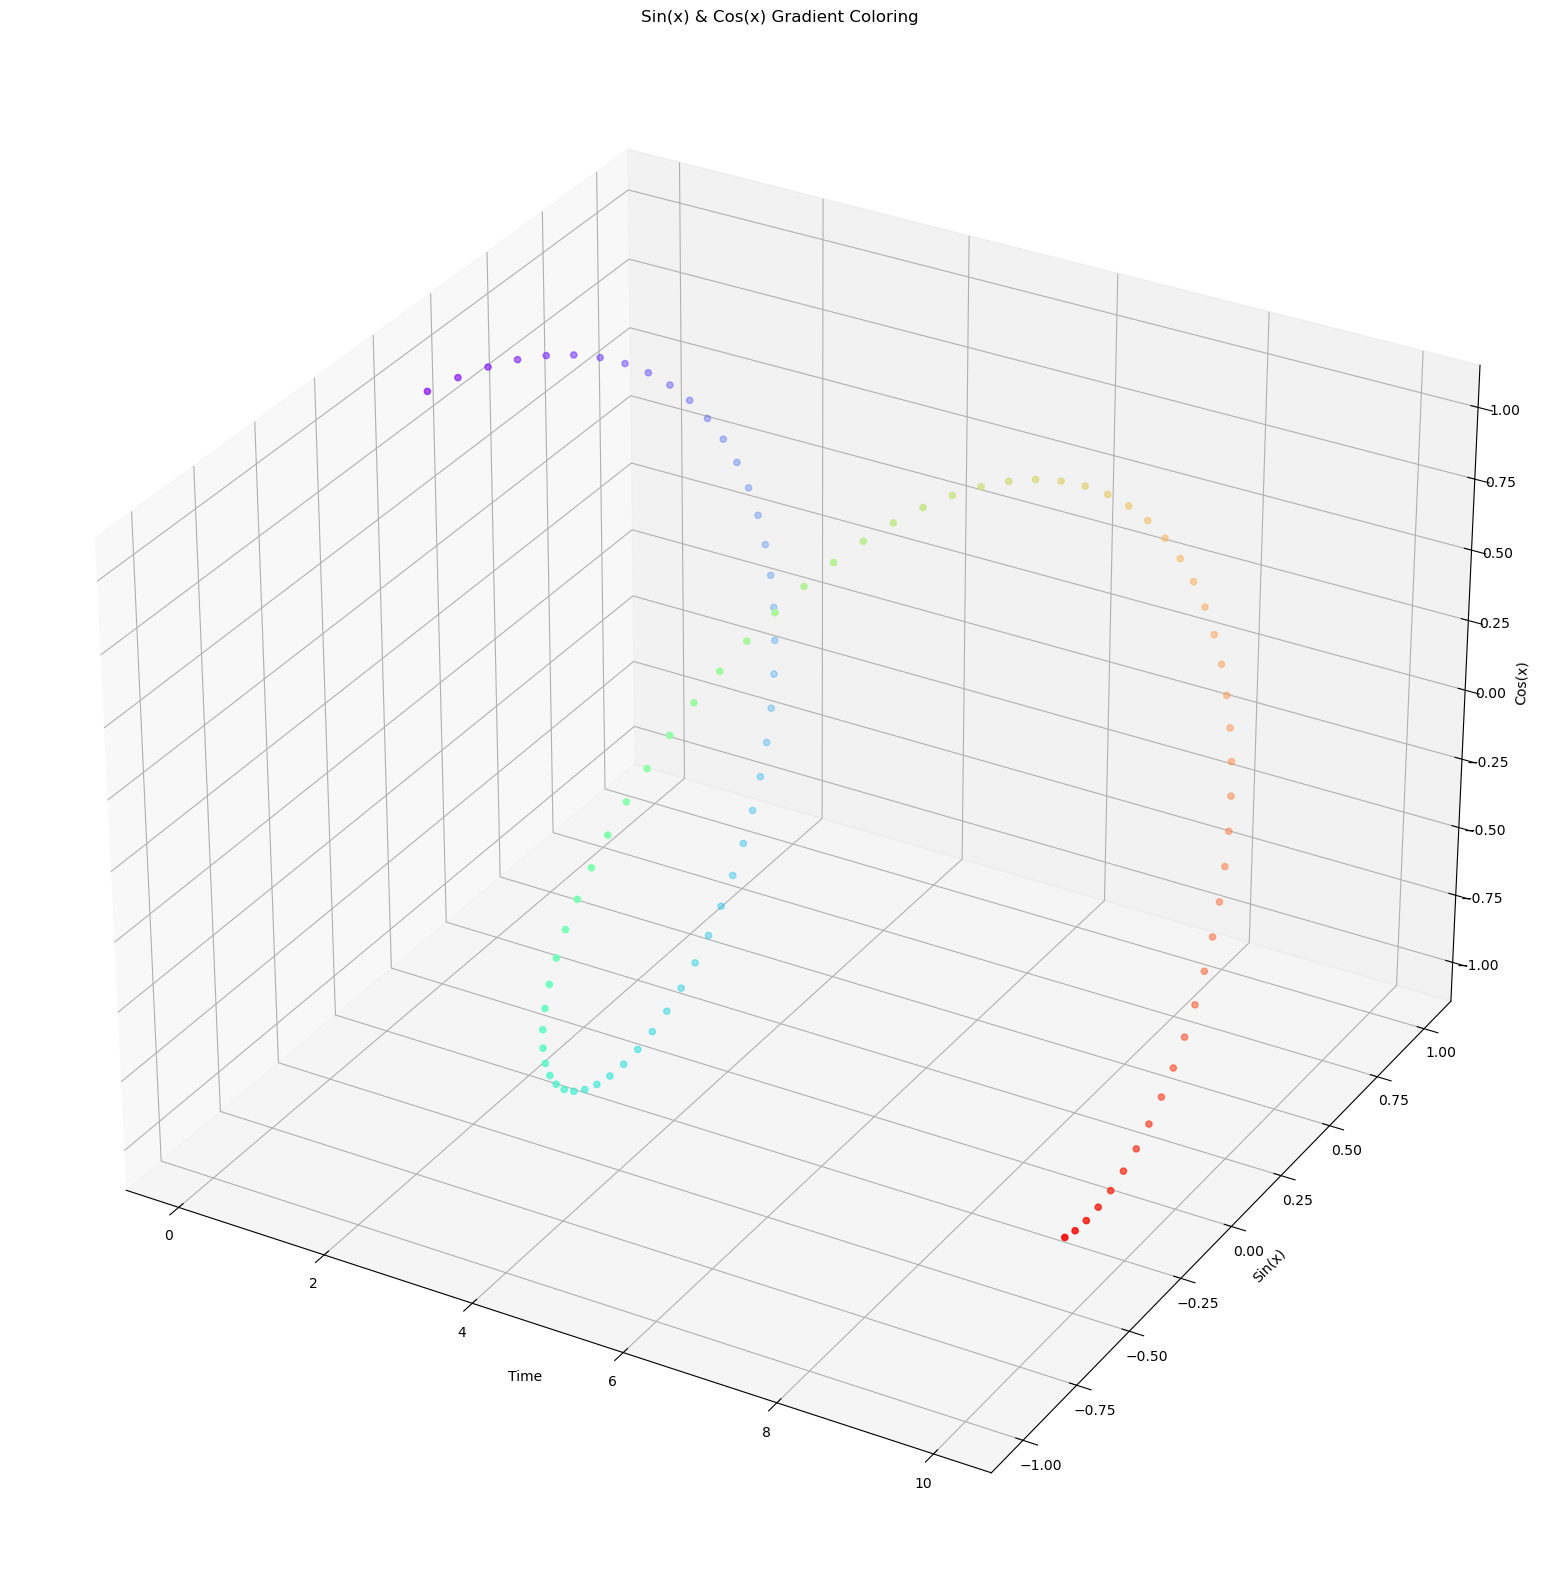

In [190]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(
    xs=synthetic_df['time'],
    ys=synthetic_df['x'],
    zs=synthetic_df['y'],
    c=synthetic_df['z'],
    cmap='rainbow'
)

ax.set_title('Sin(x) & Cos(x) Gradient Coloring')
ax.set_xlabel('Time')
ax.set_ylabel('Sin(x)')
ax.set_zlabel('Cos(x)')
plt.show()

### 🎯 **Q09 : Surface and Contour Plots of Radial Sine Function**

1. **Dataset:** *Not Required* (mathematically generated dataset)

2. **Task Description:**

   * Define a grid of values for *x* and *y* over a reasonable range (e.g., -10 to 10).
   * Compute corresponding *z* values using the equation:
     $$
     z = \sin(\sqrt{x^2 + y^2})
     $$
   * Generate the following visualizations:

     * A **3D surface plot** of the function.
     * A **filled contour plot** (*contourf*) in 2D.
     * A **3D contour plot** (*contour3D*) for a spatial representation.
   * Label axes and add titles for each plot.
   * Use appropriate colormaps for better interpretation of values (optional).

3. **Expected Outcome:**
   A set of three plots (surface, 2D contour, and 3D contour) illustrating the radial sine wave pattern defined by:
   $$z = \sin(\sqrt{x^2 + y^2})$$



In [193]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

zz = np.sin(np.sqrt(np.power(xx, 2) + np.power(yy, 2)))

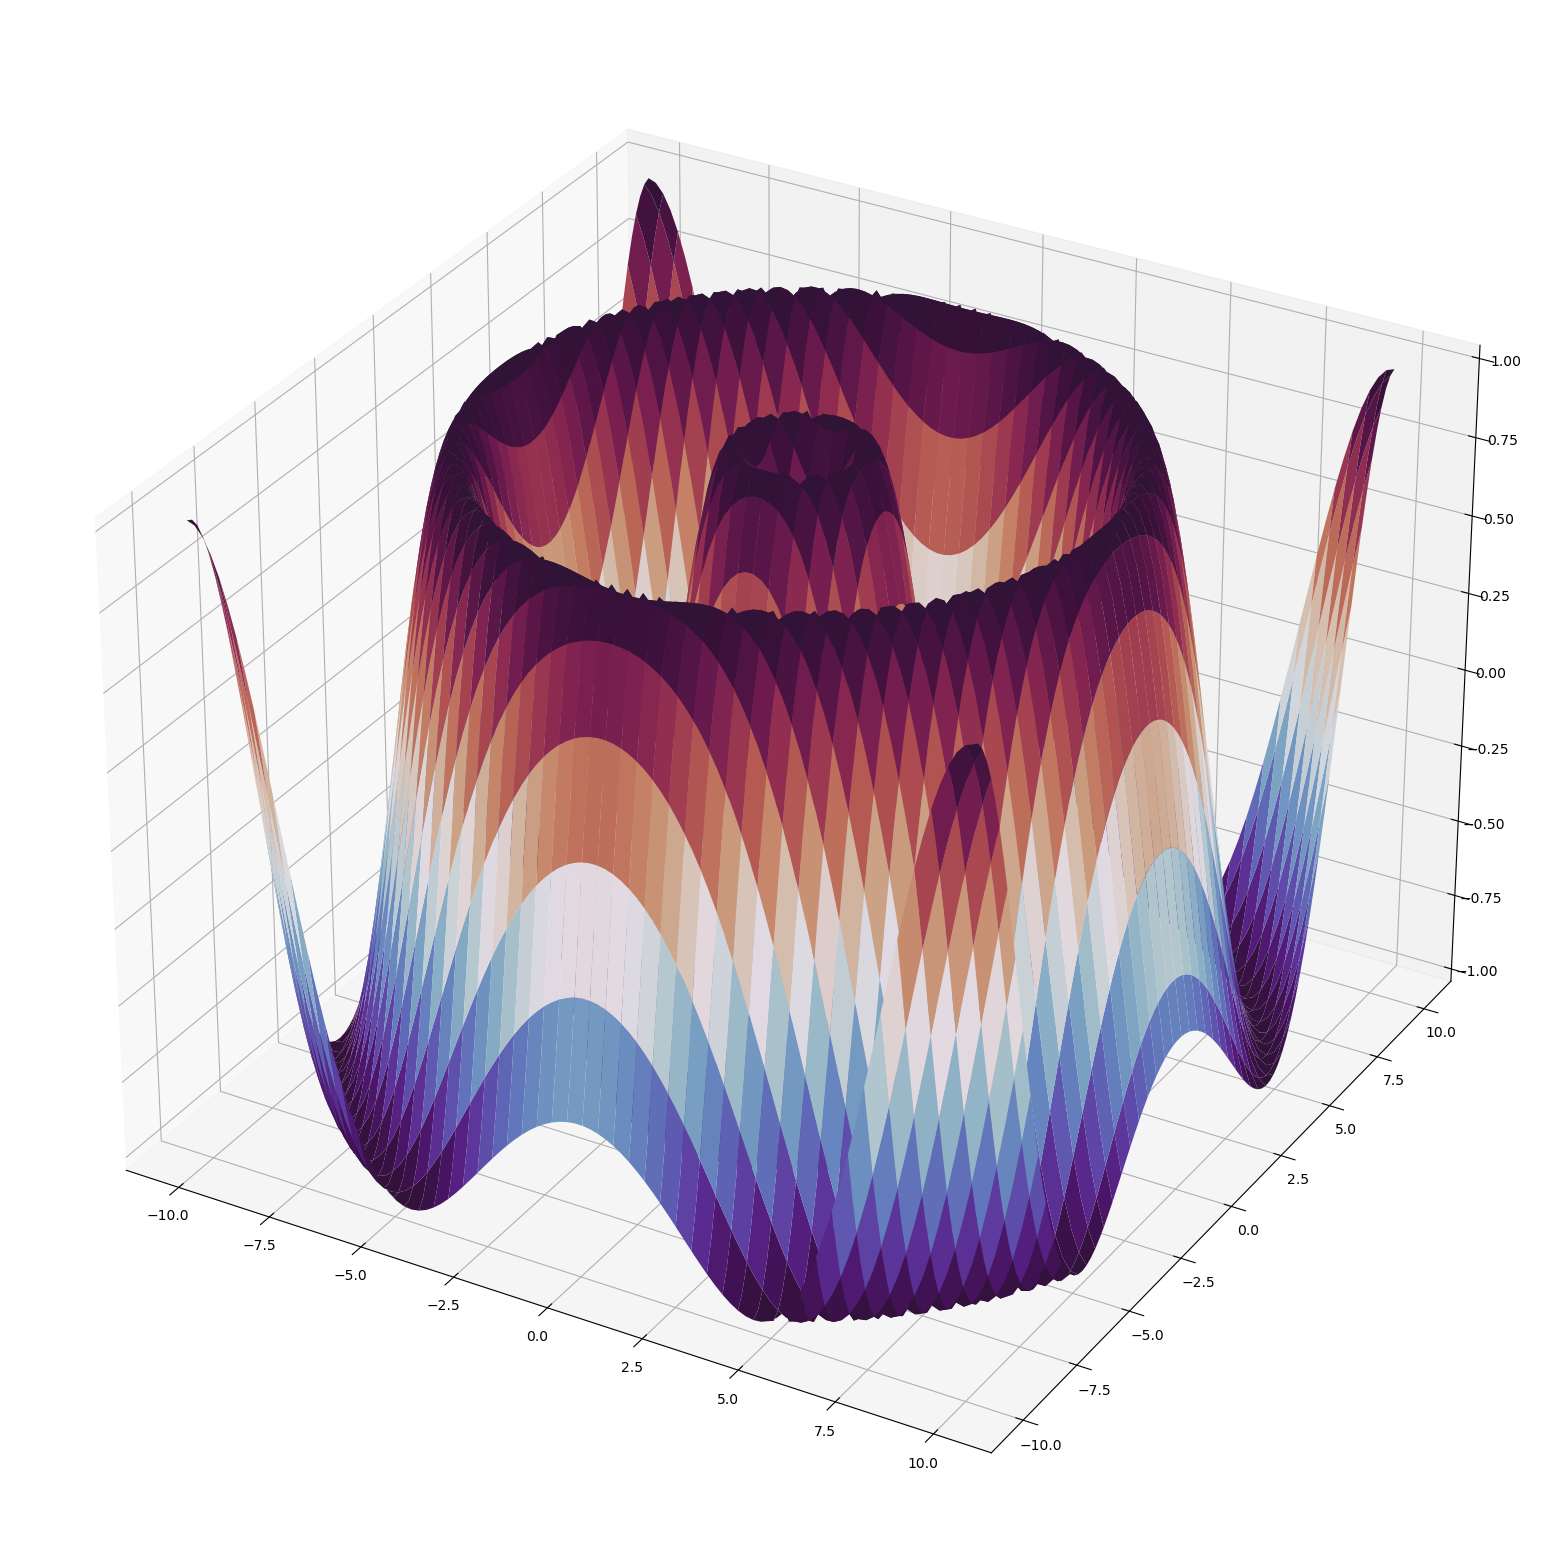

In [197]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(xx, yy, zz, cmap='twilight_shifted')

plt.show()

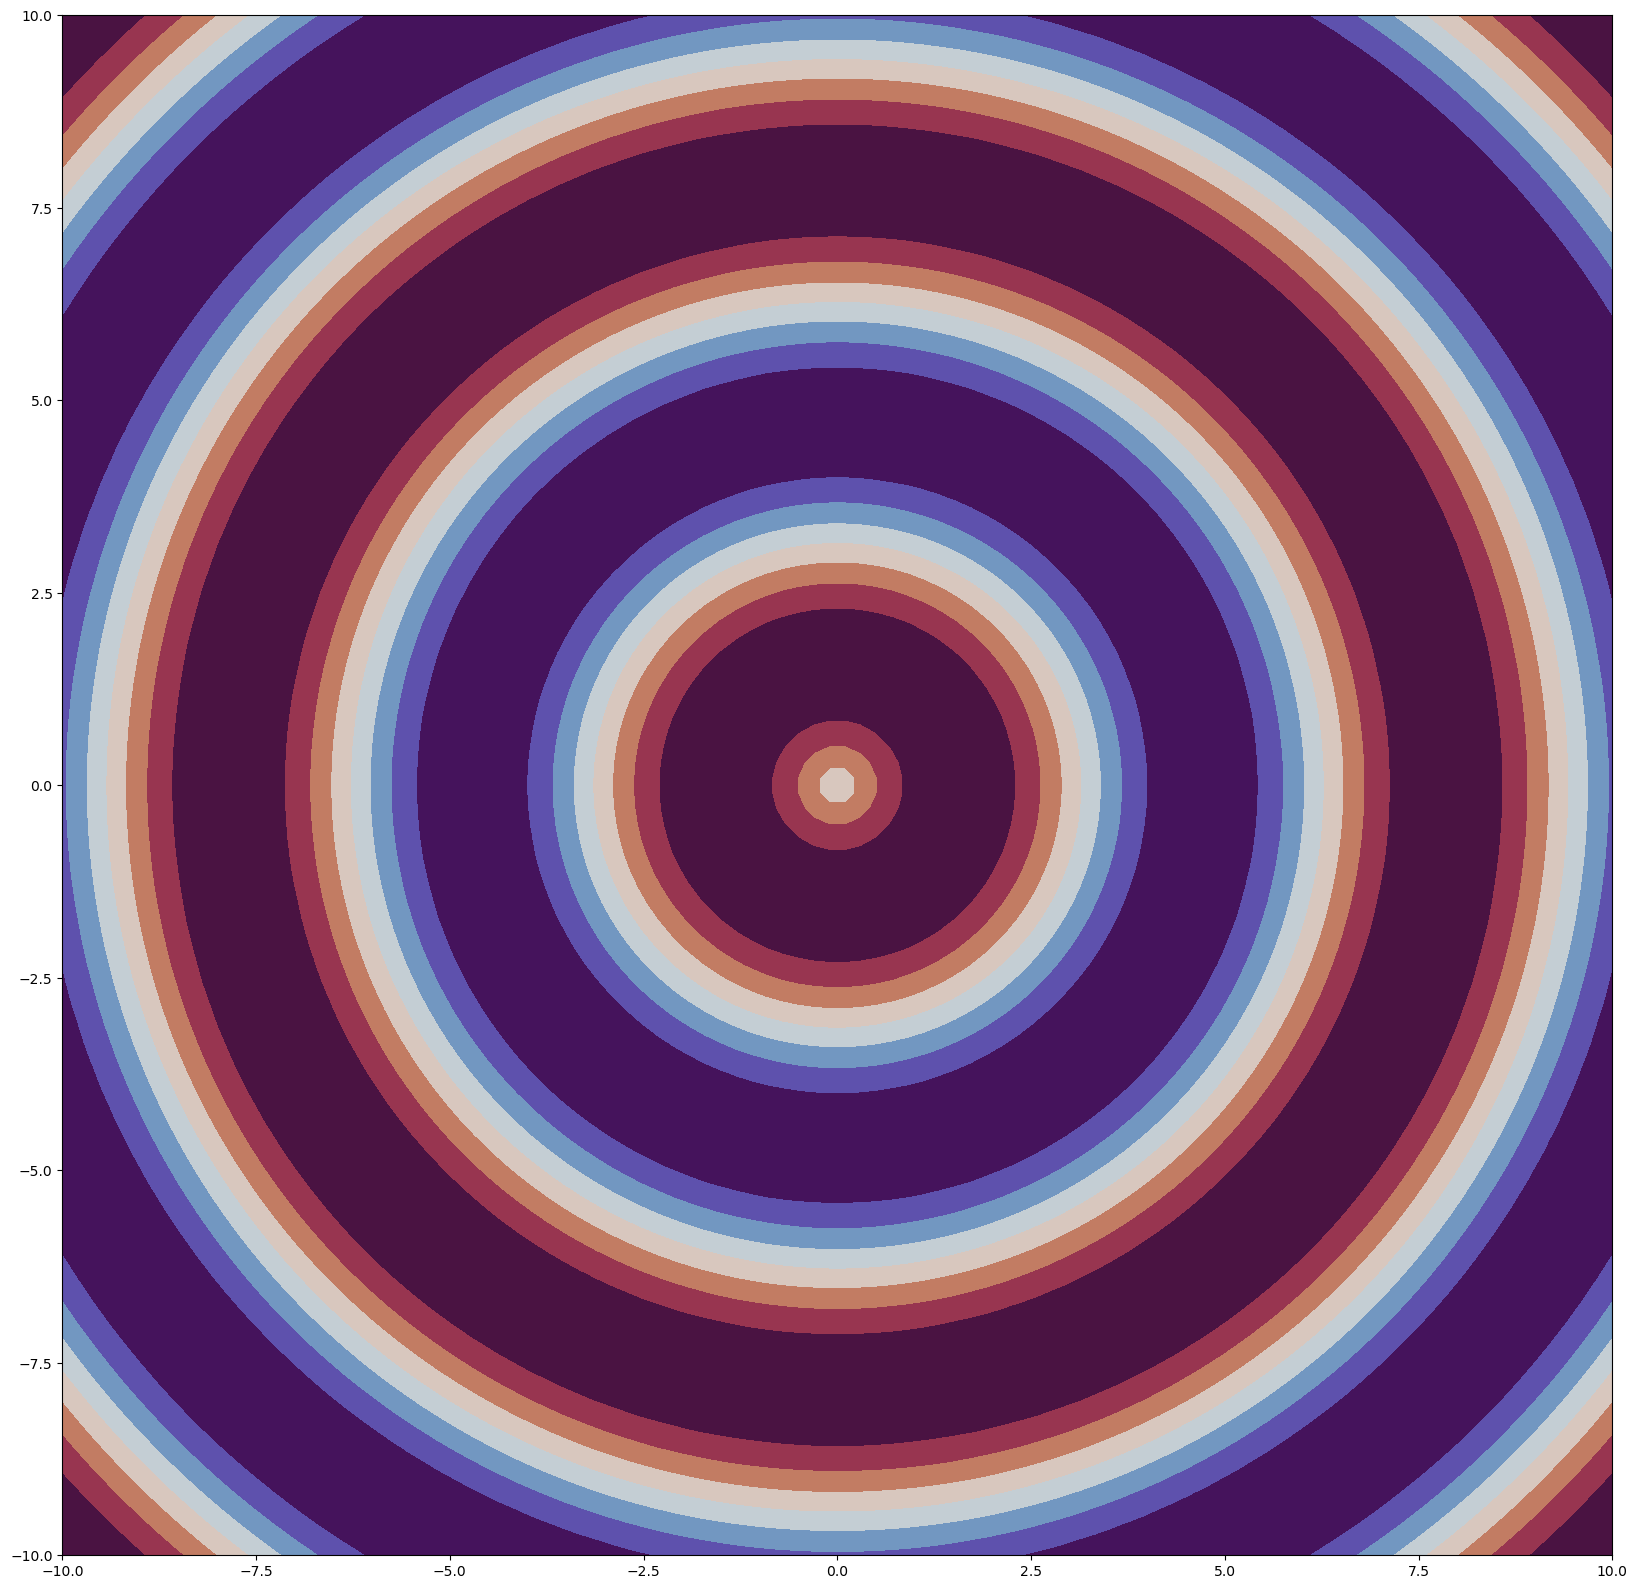

In [200]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()

ax.contourf(xx, yy, zz, cmap='twilight_shifted')

plt.show()

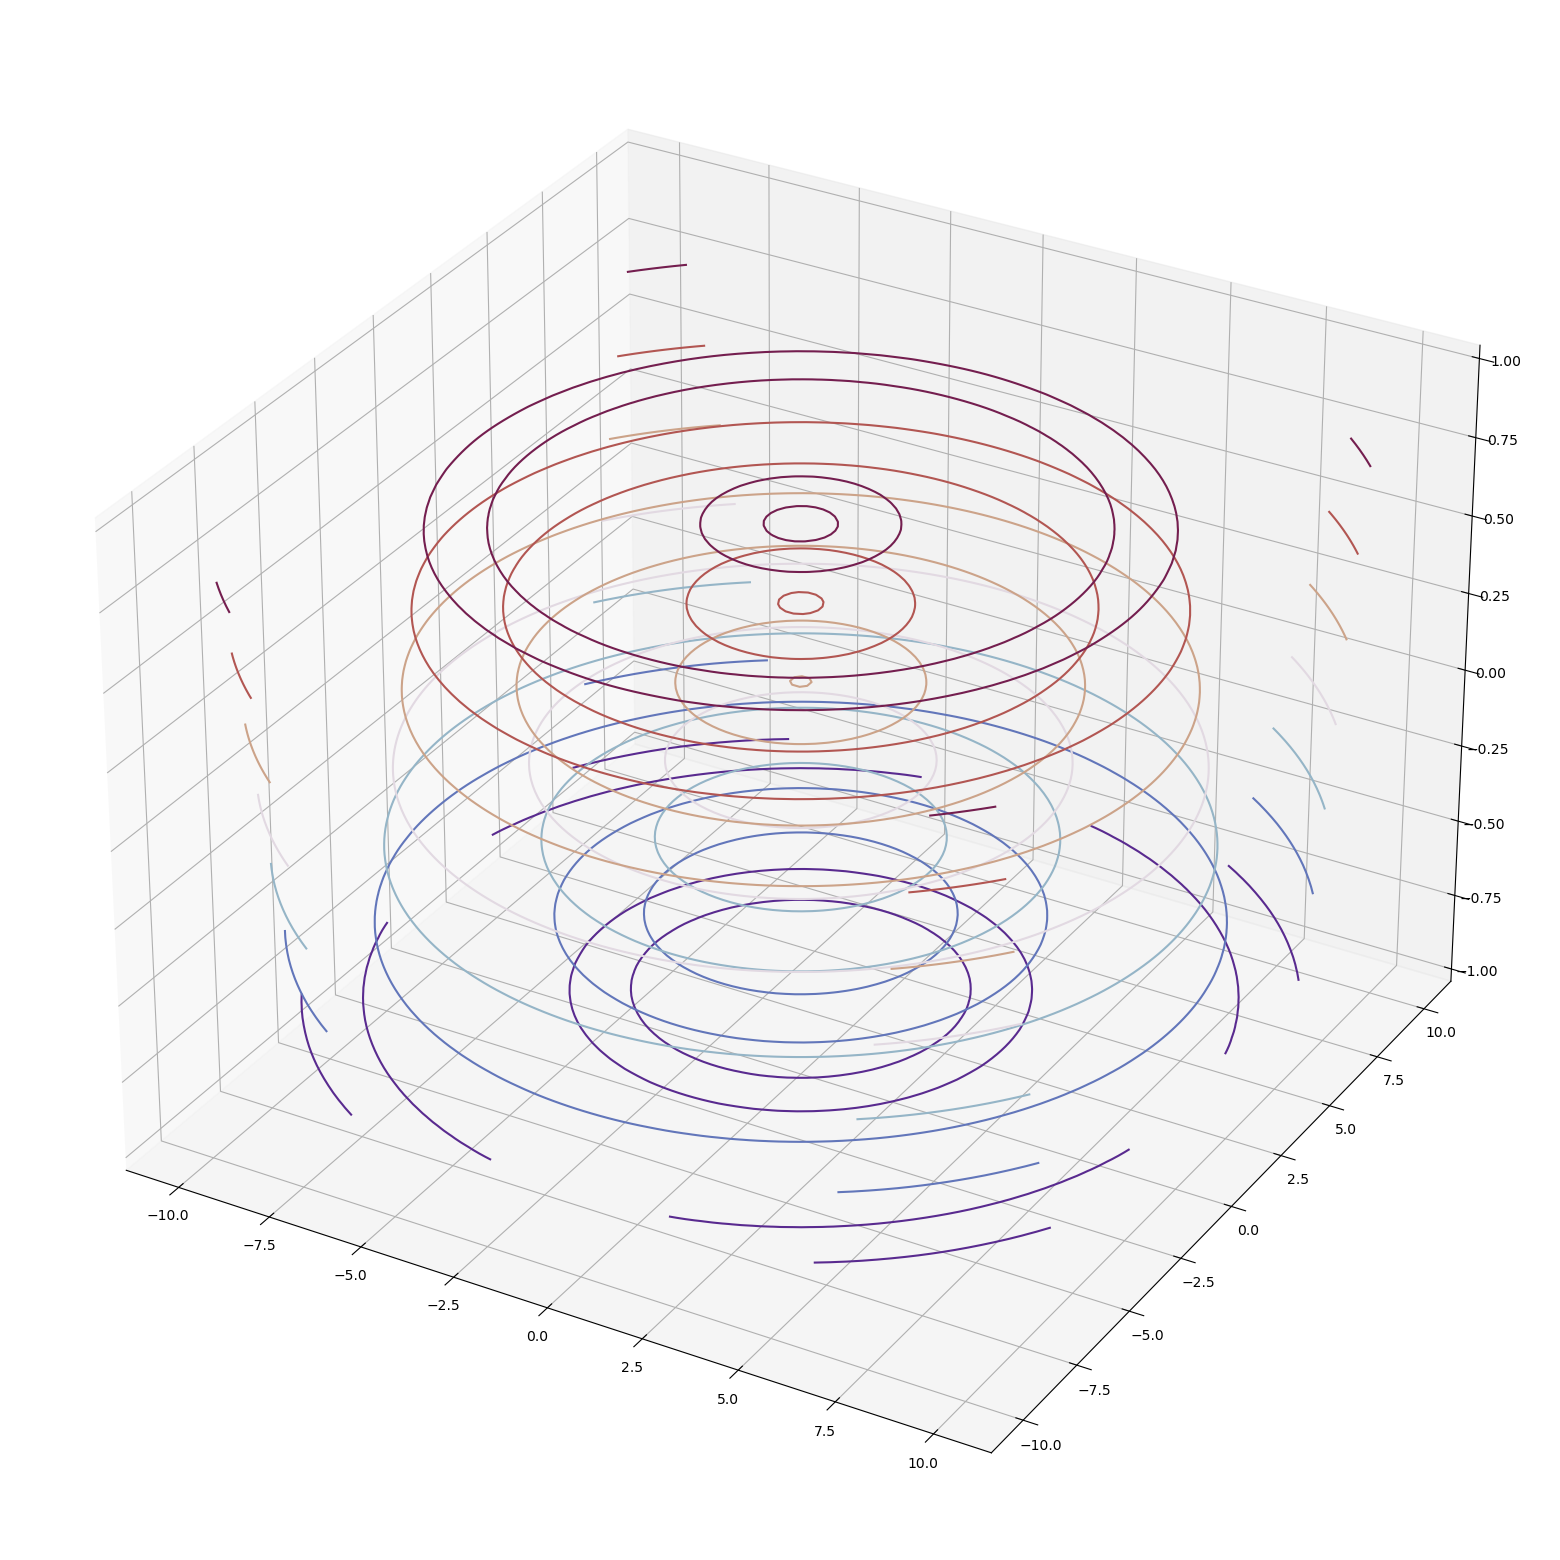

In [202]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

ax.contour3D(xx, yy, zz, cmap='twilight_shifted')

plt.show()

### 🎯 **Q10 : Surface and Contour Plots of Log-Tangent Function**

1. **Dataset:** *Not Required* (mathematically generated dataset)

2. **Task Description:**

   * Define a grid of values for *x* and *y* that avoid undefined regions of the equation (e.g., positive values since $log_2(x^2 + y^2)$ must be defined).
   * Compute corresponding *z* values using the corrected equation:
     $$
     z = \tan(\log_2(x^2 + y^2))
     $$
   * Generate the following visualizations:

     * A **3D surface plot** of the function.
     * A **filled contour plot** (*contourf*) in 2D.
     * A **3D contour plot** (*contour3D*) to illustrate contour variation in space.
   * Label all axes (*X*, *Y*, *Z*) and add descriptive titles for each plot.
   * Use a suitable colormap or color gradient for better visualization, especially due to the function's periodic nature.

3. **Expected Outcome:**
   A set of three visualizations (surface, 2D contour, and 3D contour) illustrating the behavior of the function:
   $$z = \tan(\log_2(x^2 + y^2))$$


In [203]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

zz = np.tan(np.log2(np.power(xx, 2) + np.power(yy, 2)))

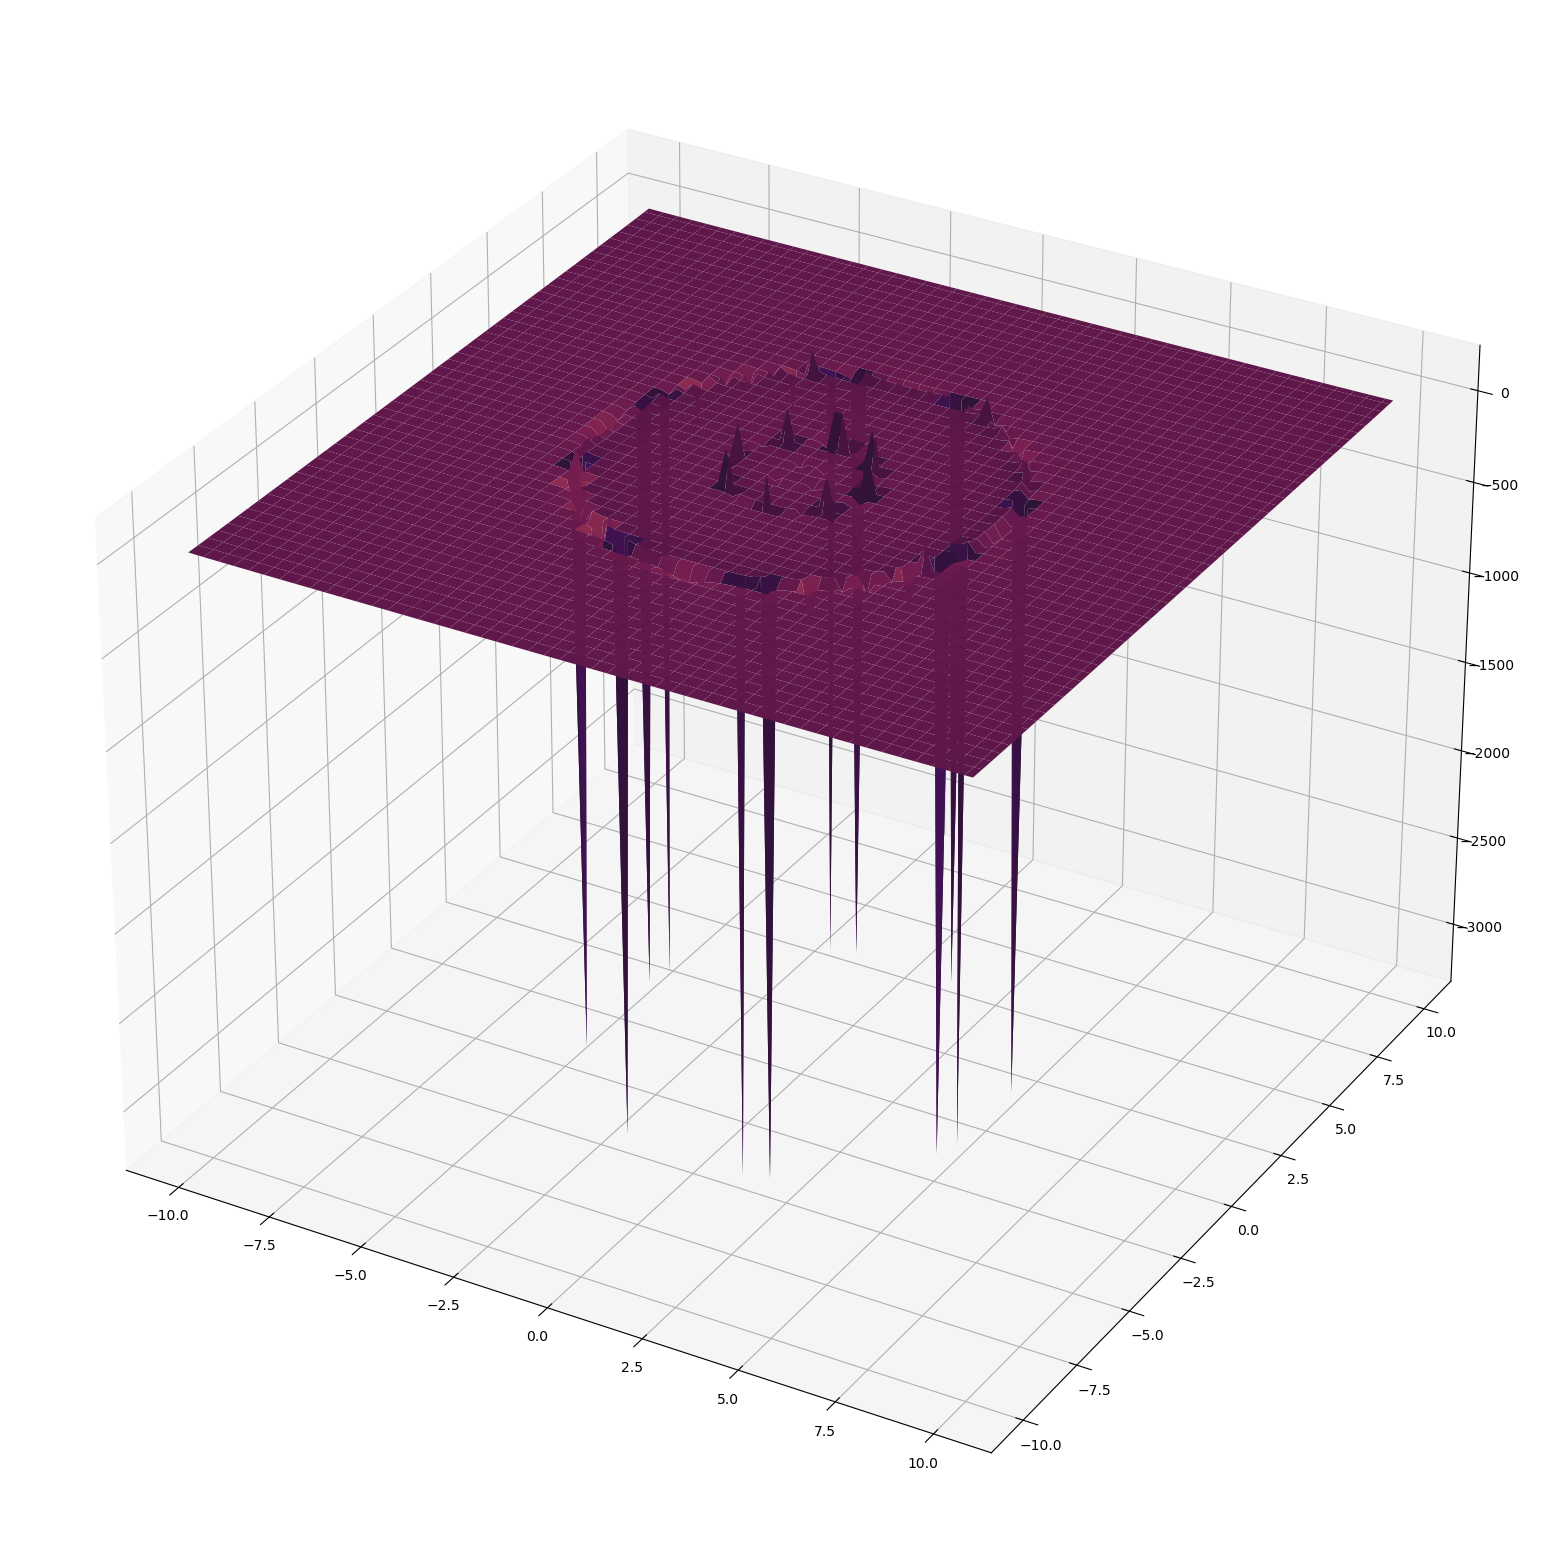

In [204]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(xx, yy, zz, cmap='twilight_shifted')

plt.show()

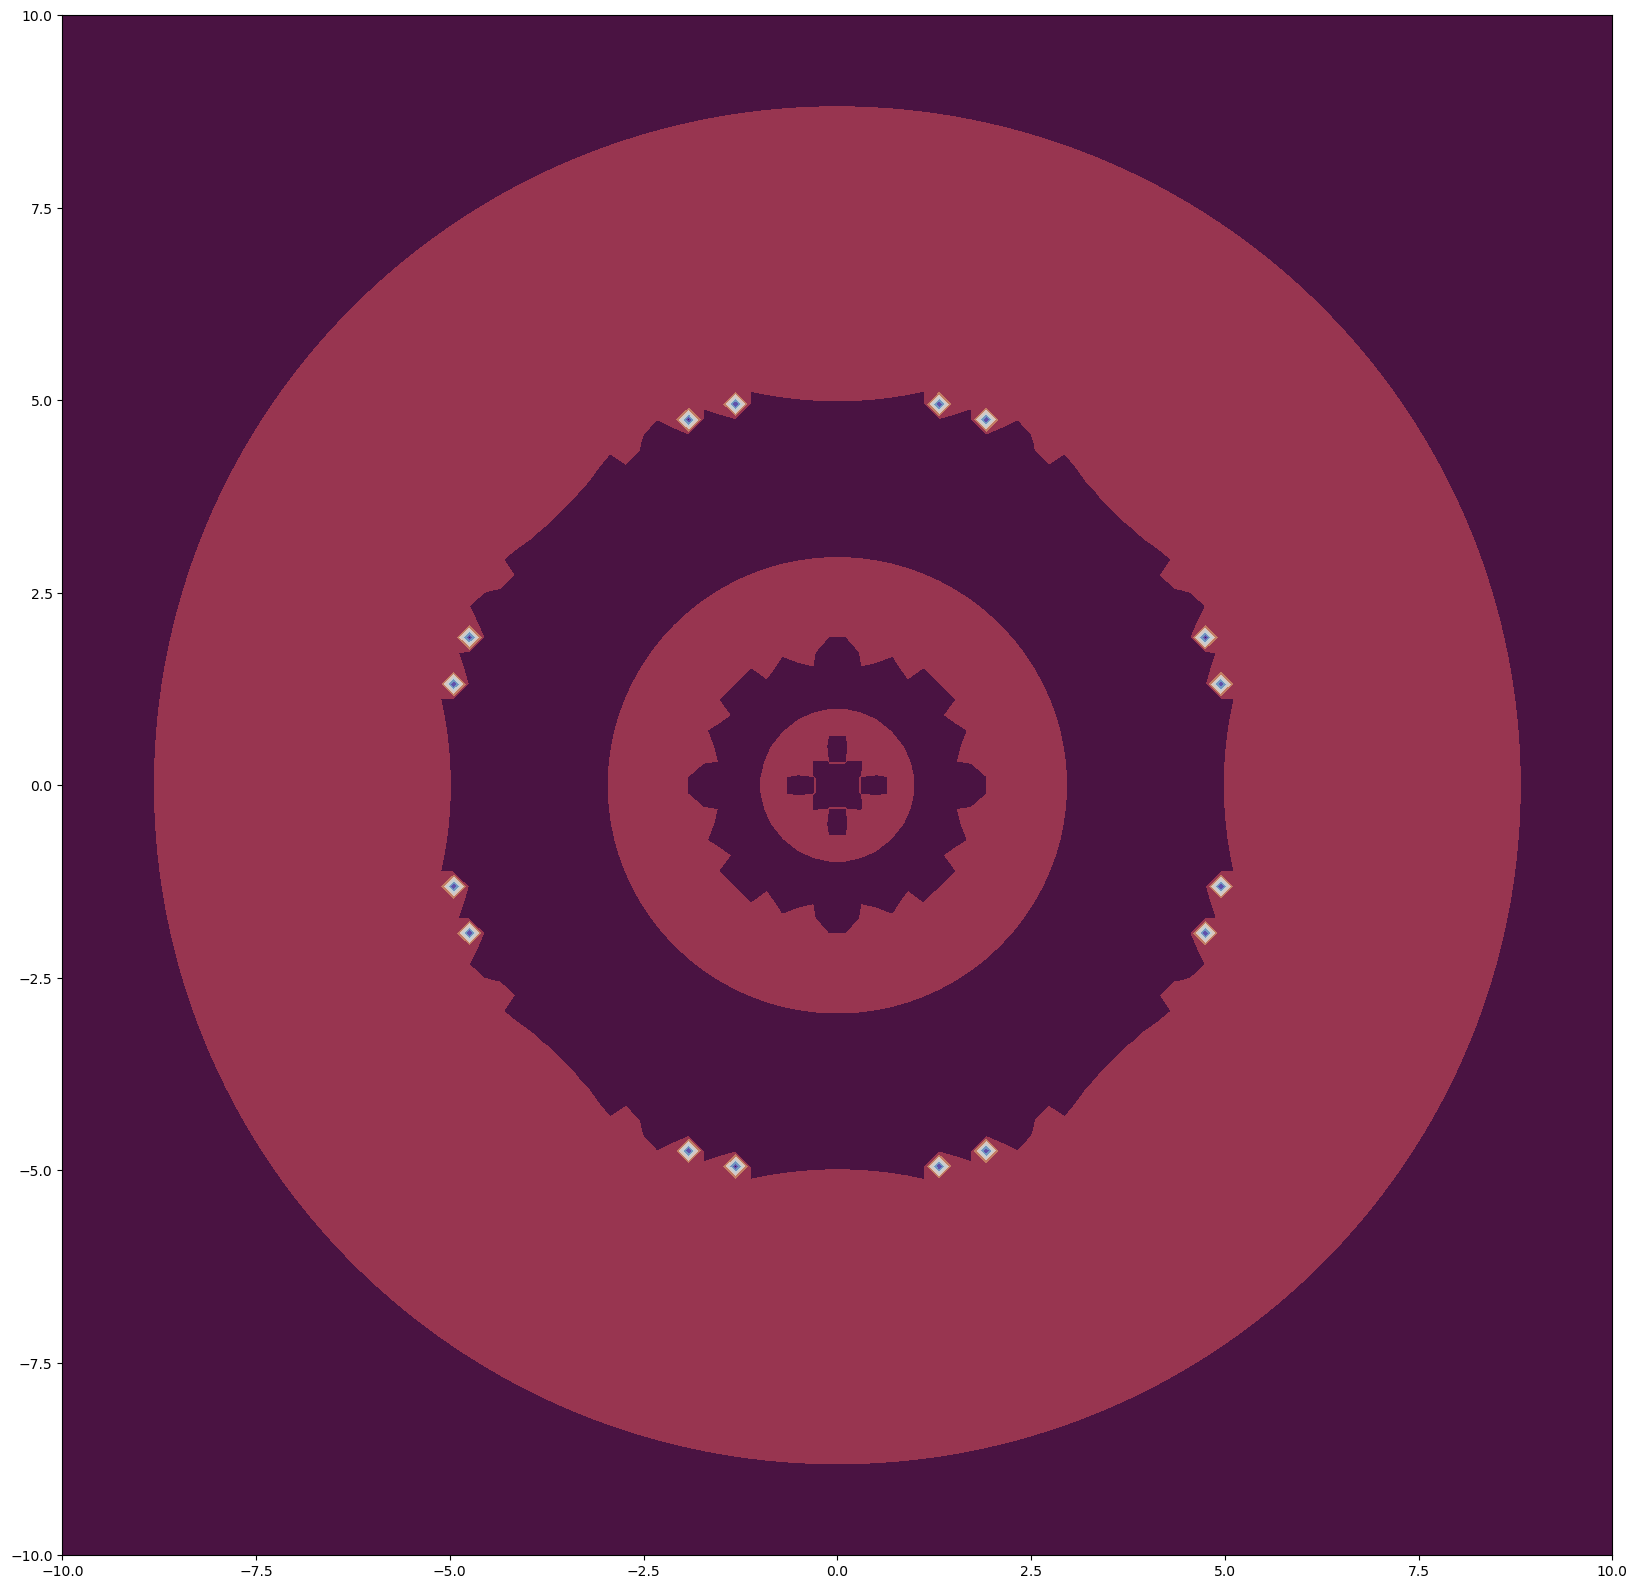

In [205]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()

ax.contourf(xx, yy, zz, cmap='twilight_shifted')

plt.show()

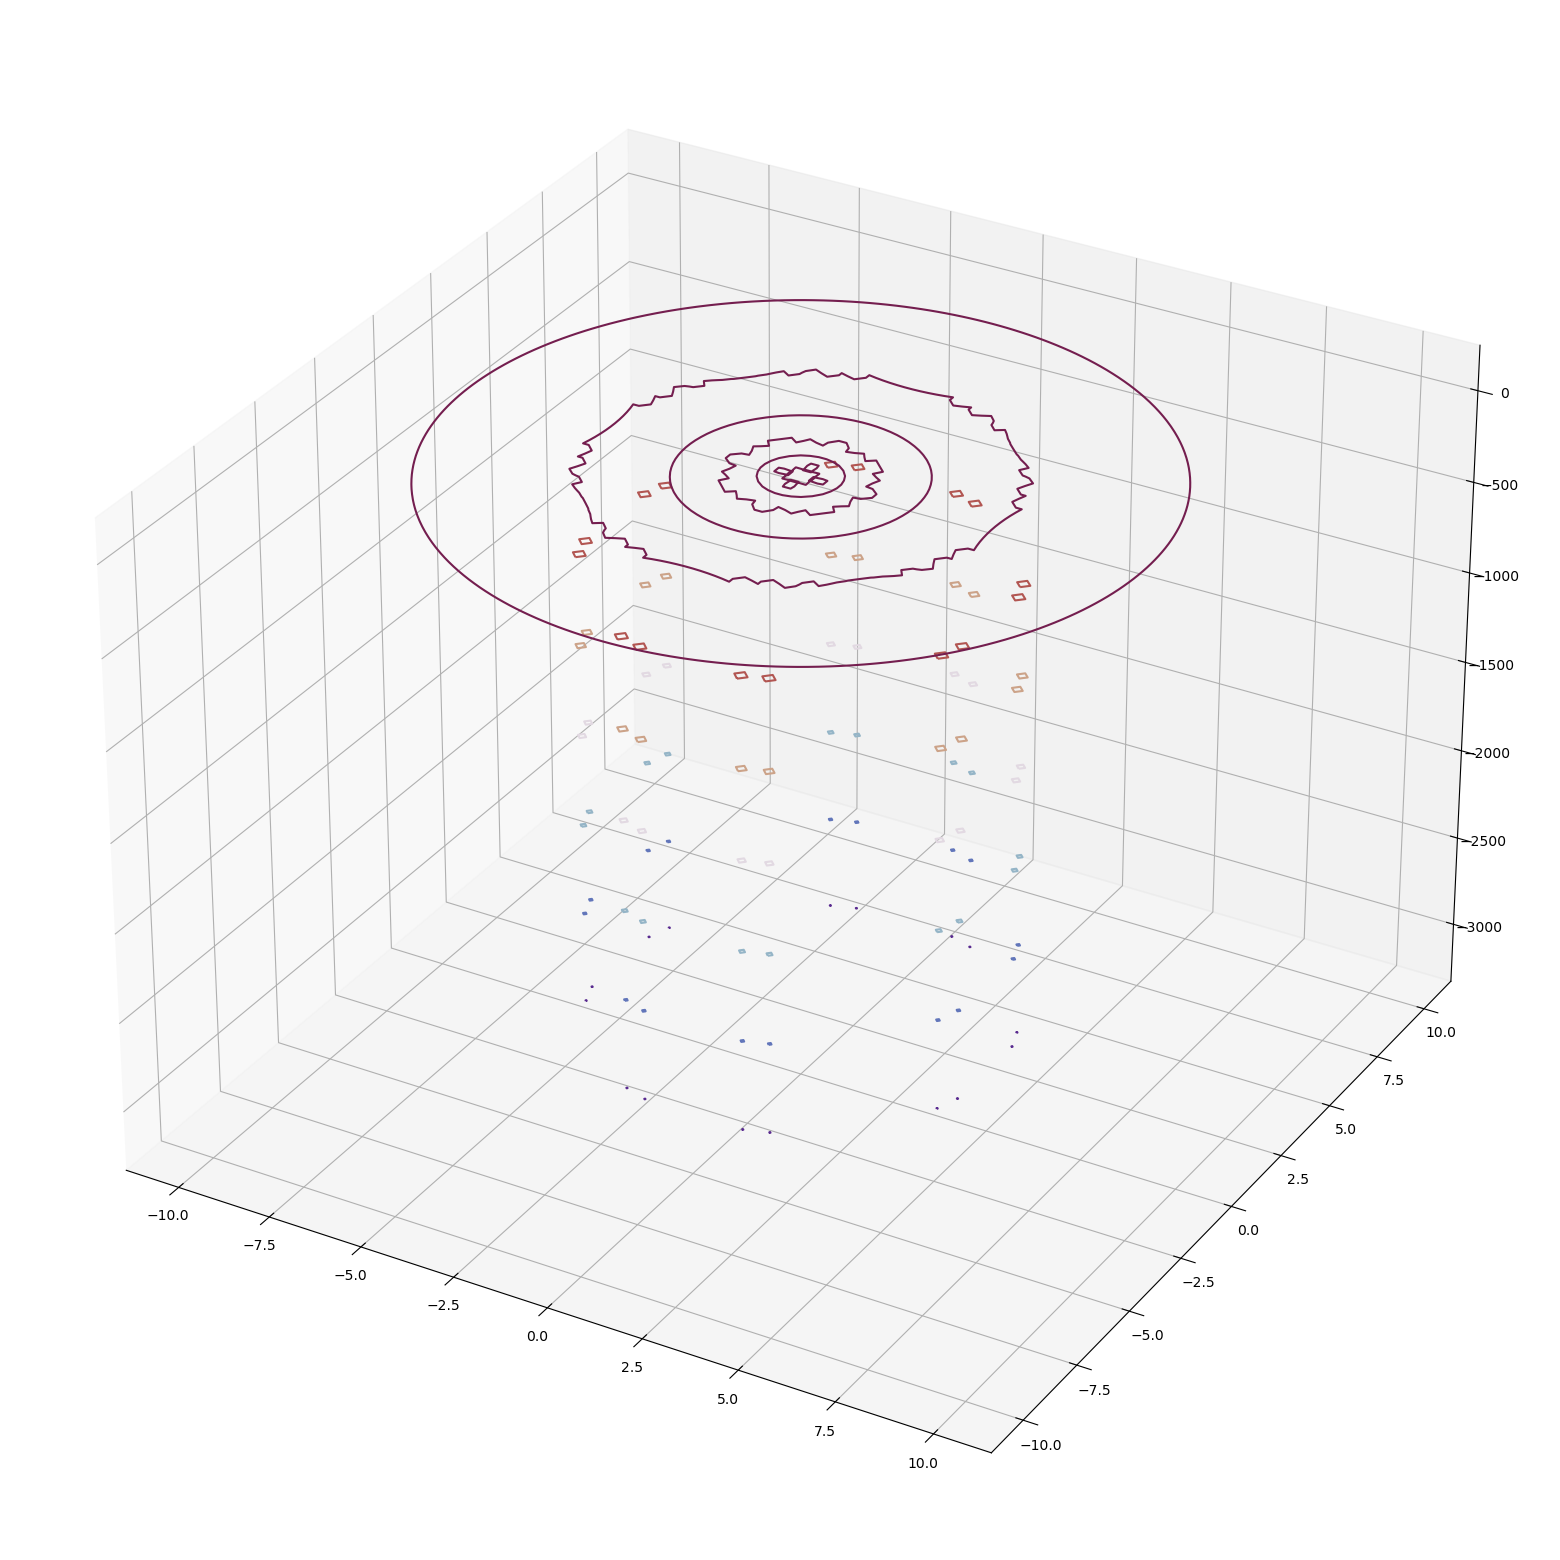

In [206]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

ax.contour3D(xx, yy, zz, cmap='twilight_shifted')

plt.show()